In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
from Modes import ModeContainer
import numpy as onp
import matplotlib.pyplot as plt
import networkx as nx
import pickle
from glob import glob

In [14]:
# load data from file
data = np.load('SachsData.npy')

# sub-select data
Ntrain = 2000
data_out = data[np.random.randint(low=0,high=data.shape[0],size=(Ntrain)),:]
print(data_out.shape)

(2000, 11)


In [15]:
# normalize data
X=(data_out-np.mean(data_out,axis=0))/np.std(data_out,axis=0)
print(X.shape)

# normalize log data
log_data = np.log(data_out)
Xlog = (log_data-np.mean(log_data,axis=0))/np.std(log_data,axis=0)
print(Xlog.shape)

(2000, 11)
(2000, 11)


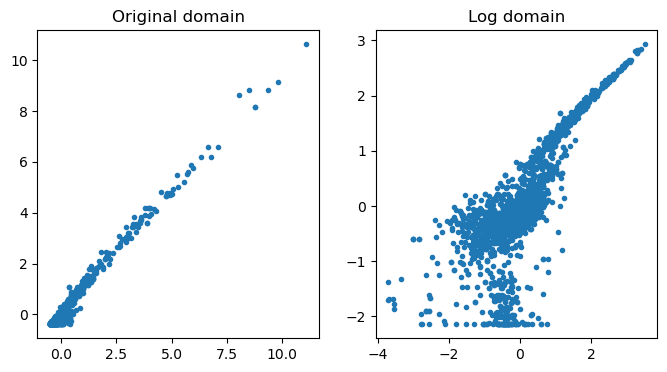

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Original domain')
plt.plot(X[:,0],X[:,1],'.')
plt.subplot(1,2,2)
plt.title('Log domain')
plt.plot(Xlog[:,0],Xlog[:,1],'.')

In [17]:
node_names=[
    '$Raf$',
    '$Mek$',
    '$Plcg$',
    '$PIP2$',
    '$PIP3$',
    '$Erk$',
    '$Akt$',
    '$PKA$',
    '$PKC$',
    '$P38$',
    '$Jnk$'
]
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1.0},
)

In [18]:
graph_discovery = GraphDiscoveryNew(X.T,onp.array(node_names),modes)

inspecting $Raf$
linear kernel (using gamma=3.40e+01)
 n/(n+s)=0.26, Z=1.00
quadratic kernel (using gamma=2.95e+01)
 n/(n+s)=0.52, Z=1.00
gaussian kernel (using gamma=9.59e-03)
 n/(n+s)=0.84, Z=0.90
Choose kernel:
$Raf$ has ancestors with linear kernel (n/(s+n)=0.26)
ancestors : ['$Mek$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.26, Z=1.00
ancestors : ['$Mek$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.26, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.26, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.26, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.26, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$', '$Jnk$']
 n/(n+s)=0.26, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$']
 n/(n+s)=0.26, Z=1.00
ancestors : ['$Mek$', '$Akt$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$']
 n/(n+s)=0.25, Z=1.00


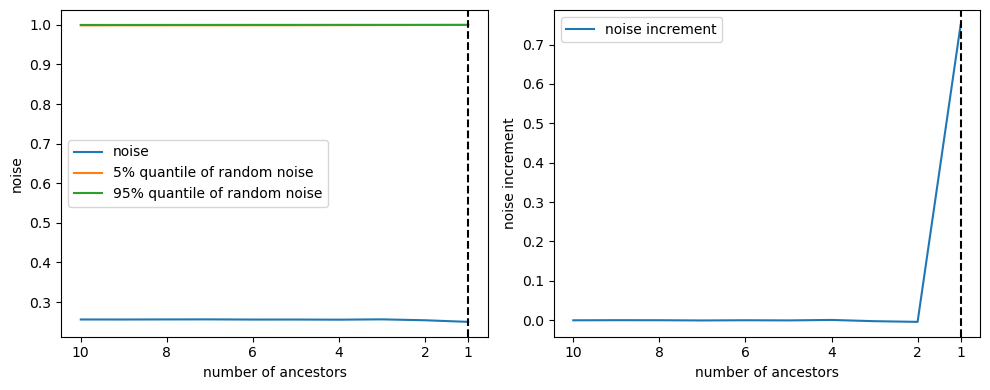

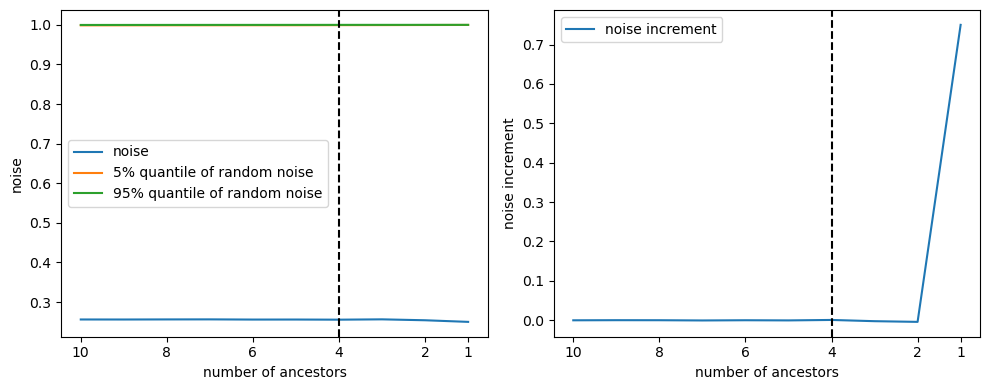

user did not confirm choice, try again


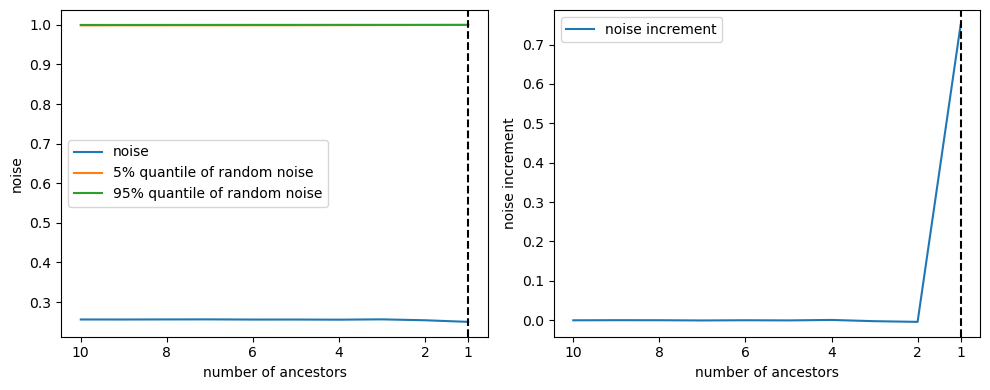

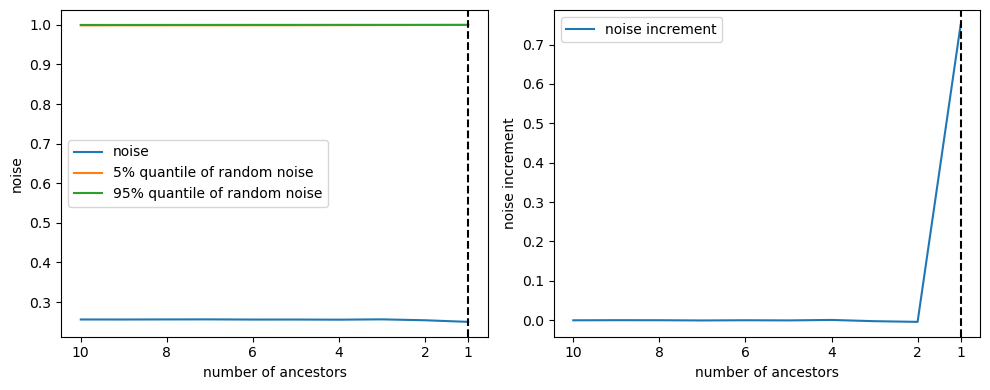

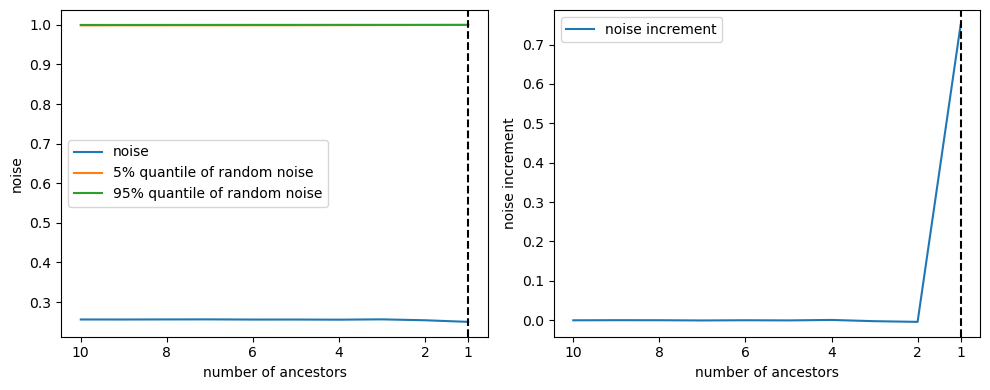

ancestors after pruning:  ['$Mek$'] 



inspecting $Mek$
linear kernel (using gamma=3.24e+01)
 n/(n+s)=0.24, Z=1.00
quadratic kernel (using gamma=2.61e+01)
 n/(n+s)=0.46, Z=1.00


KeyboardInterrupt: 

In [22]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto',kernel_chooser={'manual':True},mode_chooser={'manual':True})
    print('\n')

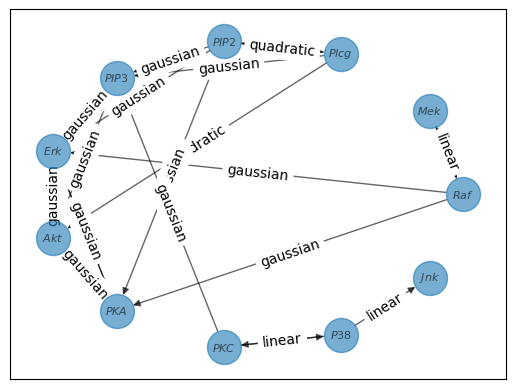

In [ ]:
graph_discovery.plot_graph()

## Repeat analysis with only linear + quadratic

In [ ]:
node_names=[
    '$Raf$',
    '$Mek$',
    '$Plcg$',
    '$PIP2$',
    '$PIP3$',
    '$Erk$',
    '$Akt$',
    '$PKA$',
    '$PKC$',
    '$P38$',
    '$Jnk$'
]
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
)

In [ ]:
graph_discovery = GraphDiscoveryNew(X.T,onp.array(node_names),modes)

inspecting $Raf$
linear kernel (using gamma=3.44e+01)
 n/(n+s)=0.25, Z=1.00
quadratic kernel (using gamma=3.09e+01)
 n/(n+s)=0.40, Z=1.00
$Raf$ has ancestors with linear kernel (n/(s+n)=0.25)
ancestors : ['$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$', '$Jnk$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$', '$Erk$']
 n/(n+s)=0.25, Z=1.00
ancestors : ['$Mek$']
 n/(n+s)=0.25, Z=1.00


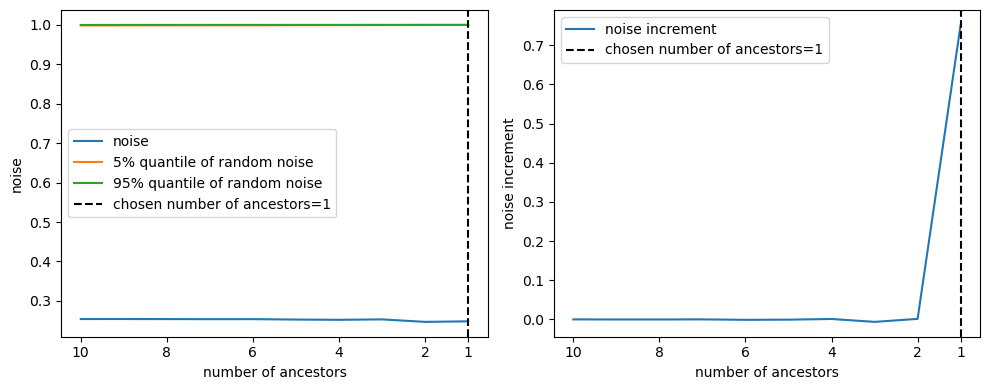

ancestors after pruning:  ['$Mek$'] 



inspecting $Mek$
linear kernel (using gamma=3.31e+01)
 n/(n+s)=0.24, Z=1.00
quadratic kernel (using gamma=2.50e+01)
 n/(n+s)=0.34, Z=1.00
$Mek$ has ancestors with linear kernel (n/(s+n)=0.24)
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.24, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$P38$']
 n/(n+s)=0.24, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$P38$']
 n/(n+s)=0.24, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$P38$']
 n/(n+s)=0.24, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$Erk$', '$Akt$', '$P38$']
 n/(n+s)=0.24, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$Erk$', '$Akt$']
 n/(n+s)=0.24, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$Akt$']
 n/(n+s)=0.24, Z=1.00
ancestors : ['$Raf$', '$Akt$']
 n/(n+s)=0.24, Z=1.00
ancestors : ['$Raf$']
 n/(n+s)=0.25, Z=1.00


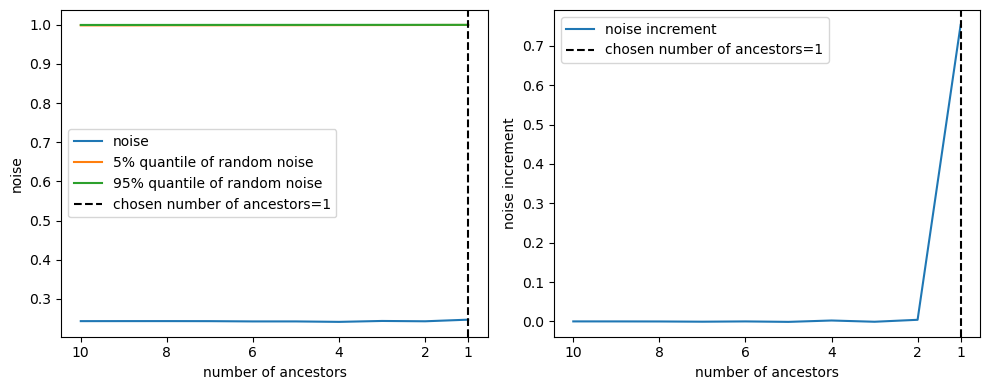

ancestors after pruning:  ['$Raf$'] 



inspecting $Plcg$
linear kernel (using gamma=2.80e+02)
 n/(n+s)=0.67, Z=1.00
quadratic kernel (using gamma=5.57e+01)
 n/(n+s)=0.62, Z=1.00
$Plcg$ has ancestors with quadratic kernel (n/(s+n)=0.62)
ancestors : ['$Raf$', '$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.62, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.61, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.60, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.64, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$Akt$', '$PKA$', '$Jnk$']
 n/(n+s)=0.64, Z=1.00
ancestors : ['$PIP2$', '$Akt$', '$PKA$', '$Jnk$']
 n/(n+s)=0.65, Z=1.00
ancestors : ['$PIP2$', '$PKA$', '$Jnk$']
 n/(n+s)=0.65, Z=1.00
ancestors : ['$PIP2$', '$PKA$']
 n/(n+s)=0.67, Z=1.00
ancestors : ['$PIP2$']
 n/(n+s)=0.78, Z=1.00


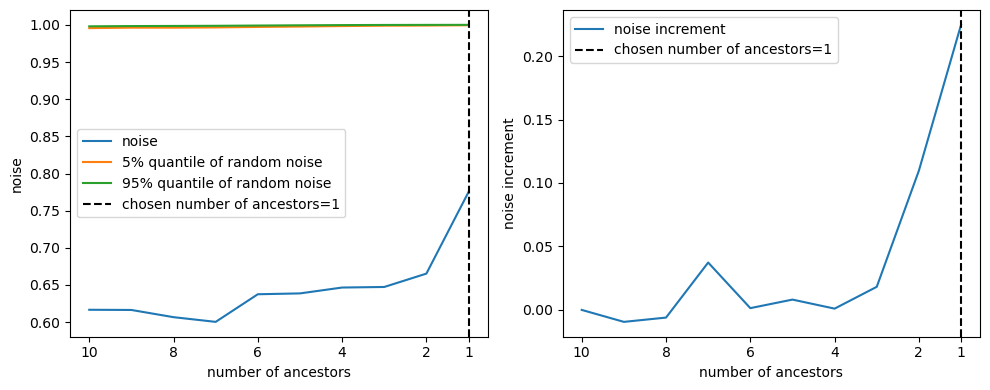

ancestors after pruning:  ['$PIP2$'] 



inspecting $PIP2$
linear kernel (using gamma=3.14e+02)
 n/(n+s)=0.71, Z=1.00
quadratic kernel (using gamma=2.07e+02)
 n/(n+s)=0.83, Z=1.00
$PIP2$ has ancestors with linear kernel (n/(s+n)=0.71)
ancestors : ['$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.71, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.70, Z=1.00
ancestors : ['$Plcg$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.70, Z=1.00
ancestors : ['$Plcg$', '$PIP3$', '$Akt$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.70, Z=1.00
ancestors : ['$Plcg$', '$PIP3$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.70, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.71, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$Jnk$']
 n/(n+s)=0.70, Z=1.00
ancestors : ['$Plcg$', '$Akt$']
 n/(n+s)=0.70, Z=1.00
ancestors : ['$Plcg$']
 n/(n+s)=0.71, Z=1.00


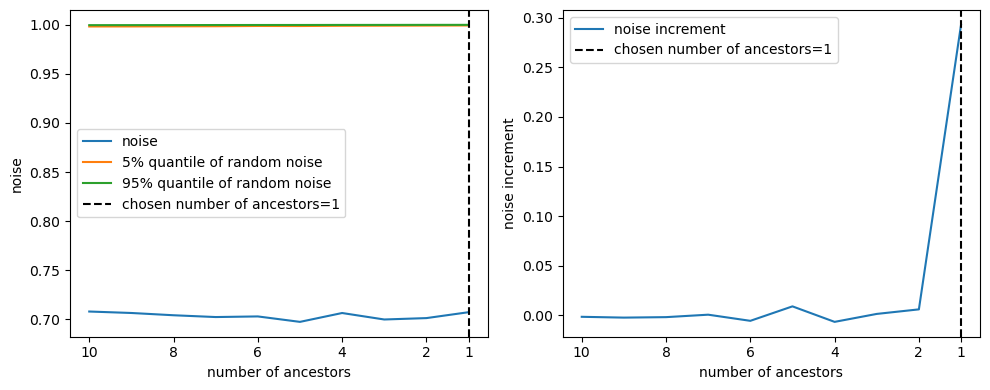

ancestors after pruning:  ['$Plcg$'] 



inspecting $PIP3$
linear kernel (using gamma=1.87e+03)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=1.72e+03)
 n/(n+s)=1.00, Z=1.00
$PIP3$ has ancestors with quadratic kernel (n/(s+n)=1.00)
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$P38$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$P38$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$PIP2$', '$Akt$', '$P38$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$PIP2$', '$Akt$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$PIP2$']
 n/(n+s)=1.00, Z=1.00


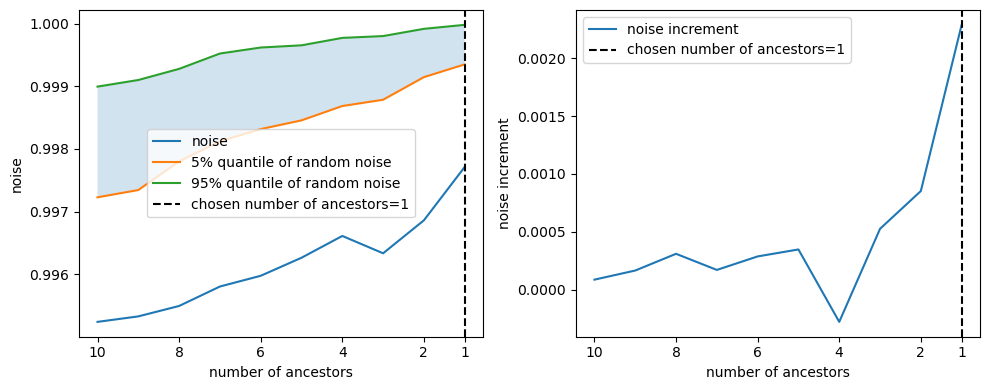

ancestors after pruning:  ['$PIP2$'] 



inspecting $Erk$
linear kernel (using gamma=6.38e+02)
 n/(n+s)=0.86, Z=1.00
quadratic kernel (using gamma=3.52e+02)
 n/(n+s)=0.86, Z=1.00
$Erk$ has ancestors with linear kernel (n/(s+n)=0.86)
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.86, Z=1.00


KeyboardInterrupt: 

In [19]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto',kernel_chooser='manual',mode_chooser='manual')
    print('\n')

inspecting $Erk$
linear kernel (using gamma=6.38e+02)
 n/(n+s)=0.86, Z=1.00
quadratic kernel (using gamma=3.52e+02)
 n/(n+s)=0.86, Z=1.00
$Erk$ has ancestors with linear kernel (n/(s+n)=0.86)
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$P38$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$PKA$', '$P38$']
 n/(n+s)=0.85, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$PKA$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Akt$', '$PKA$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Akt$']
 n/(n+s)=0.88, Z=1.00


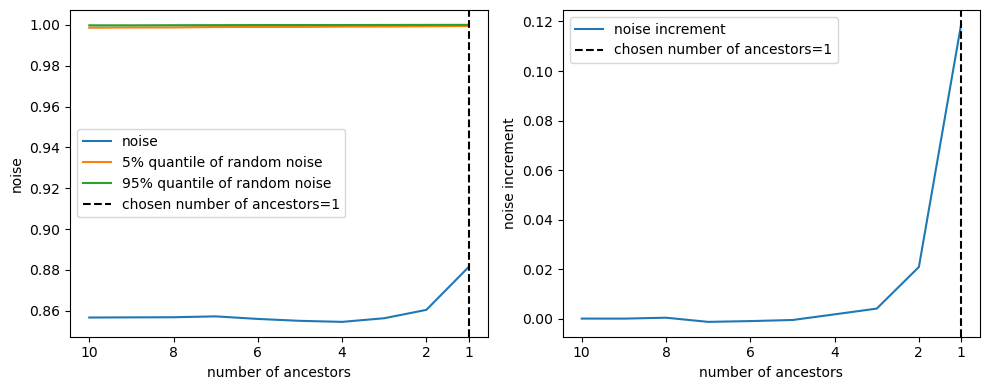

ancestors after pruning:  ['$Akt$'] 



inspecting $Akt$
linear kernel (using gamma=4.99e+02)
 n/(n+s)=0.76, Z=1.00
quadratic kernel (using gamma=1.48e+02)
 n/(n+s)=0.66, Z=1.00
$Akt$ has ancestors with quadratic kernel (n/(s+n)=0.66)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.66, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.66, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.67, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.66, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$PKA$', '$Jnk$']
 n/(n+s)=0.66, Z=1.00
ancestors : ['$Plcg$', '$Erk$', '$PKA$', '$Jnk$']
 n/(n+s)=0.68, Z=1.00
ancestors : ['$Plcg$', '$Erk$', '$PKA$']
 n/(n+s)=0.68, Z=1.00
ancestors : ['$Plcg$', '$Erk$']
 n/(n+s)=0.75, Z=1.00
ancestors : ['$Erk$']
 n/(n+s)=0.88, Z=1.00


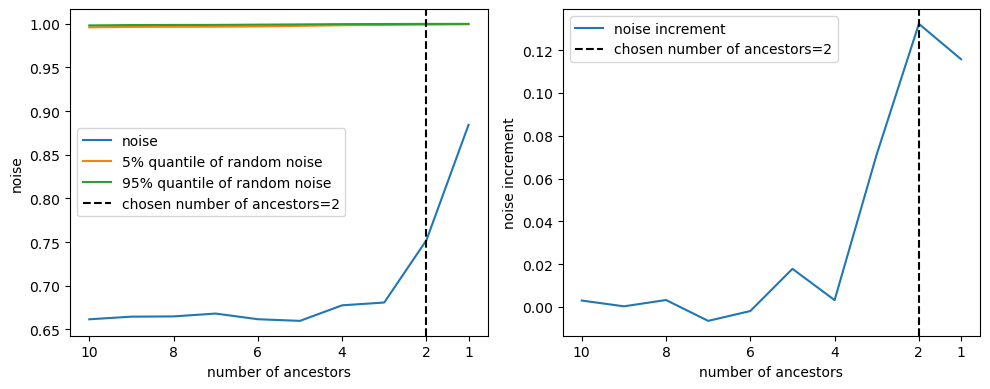

ancestors after pruning:  ['$Plcg$', '$Erk$'] 



inspecting $PKA$
linear kernel (using gamma=1.51e+03)
 n/(n+s)=0.98, Z=1.00
quadratic kernel (using gamma=1.34e+03)
 n/(n+s)=0.96, Z=1.00
$PKA$ has ancestors with quadratic kernel (n/(s+n)=0.96)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$Jnk$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$Jnk$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$Jnk$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$Akt$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Plcg$', '$Erk$', '$Akt$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Erk$', '$Akt$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Erk$']
 n/(n+s)=0.99, Z=1.00


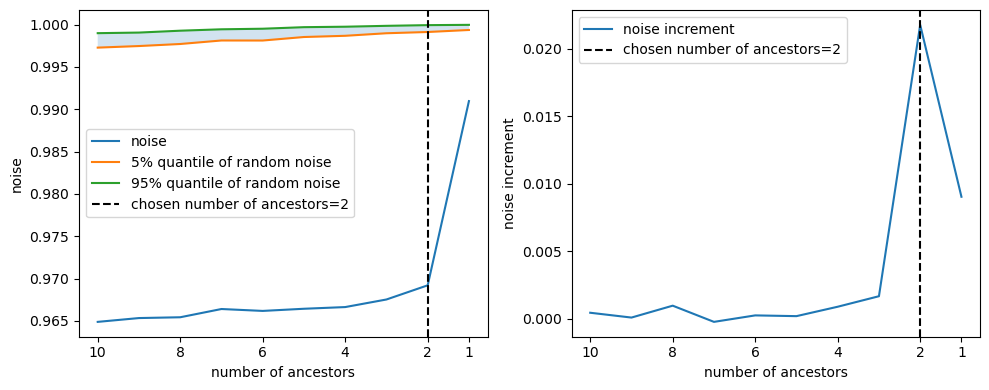

ancestors after pruning:  ['$Erk$', '$Akt$'] 



inspecting $PKC$
linear kernel (using gamma=7.73e+01)
 n/(n+s)=0.44, Z=1.00
quadratic kernel (using gamma=4.54e+01)
 n/(n+s)=0.72, Z=1.00
$PKC$ has ancestors with linear kernel (n/(s+n)=0.44)
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.44, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.44, Z=1.00
ancestors : ['$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.44, Z=1.00
ancestors : ['$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.44, Z=1.00
ancestors : ['$PIP2$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.44, Z=1.00
ancestors : ['$PIP2$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.44, Z=1.00
ancestors : ['$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.43, Z=1.00
ancestors : ['$P38$', '$Jnk$']
 n/(n+s)=0.41, Z=1.00
ancestors : ['$P38$']
 n/(n+s)=0.38, Z=1.00


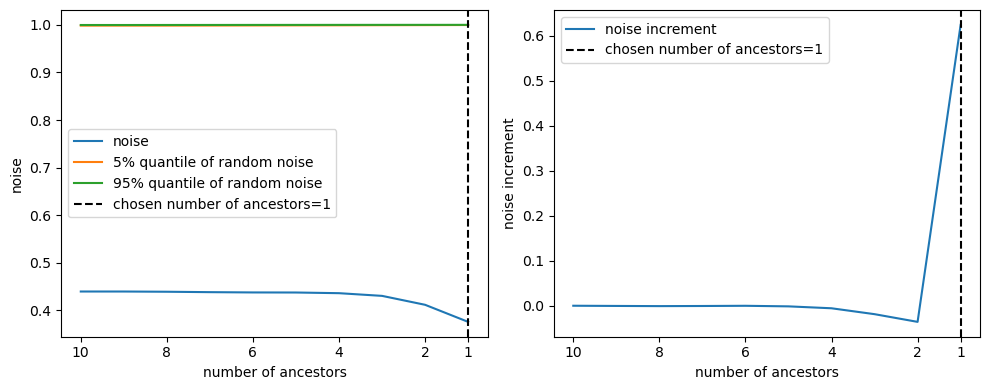

ancestors after pruning:  ['$P38$'] 



inspecting $P38$
linear kernel (using gamma=7.46e+01)
 n/(n+s)=0.43, Z=1.00
quadratic kernel (using gamma=5.07e+01)
 n/(n+s)=0.68, Z=1.00
$P38$ has ancestors with linear kernel (n/(s+n)=0.43)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.43, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.43, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.43, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.43, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Akt$', '$PKC$', '$Jnk$']
 n/(n+s)=0.43, Z=1.00
ancestors : ['$Mek$', '$Akt$', '$PKC$', '$Jnk$']
 n/(n+s)=0.42, Z=1.00
ancestors : ['$Akt$', '$PKC$', '$Jnk$']
 n/(n+s)=0.42, Z=1.00
ancestors : ['$PKC$', '$Jnk$']
 n/(n+s)=0.41, Z=1.00
ancestors : ['$PKC$']
 n/(n+s)=0.37, Z=1.00


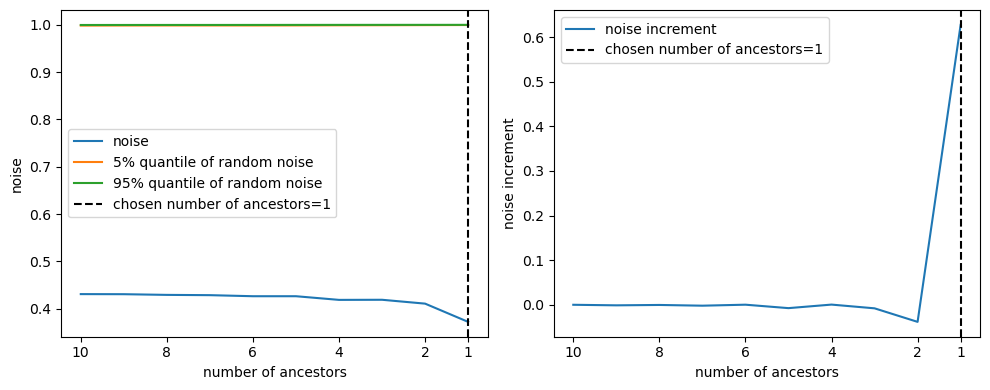

ancestors after pruning:  ['$PKC$'] 



inspecting $Jnk$
linear kernel (using gamma=5.75e+02)
 n/(n+s)=0.74, Z=1.00
quadratic kernel (using gamma=3.94e+02)
 n/(n+s)=0.90, Z=1.00
$Jnk$ has ancestors with linear kernel (n/(s+n)=0.74)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Plcg$', '$PKC$', '$P38$']
 n/(n+s)=0.75, Z=1.00
ancestors : ['$PKC$', '$P38$']
 n/(n+s)=0.77, Z=1.00
ancestors : ['$P38$']
 n/(n+s)=0.84, Z=1.00


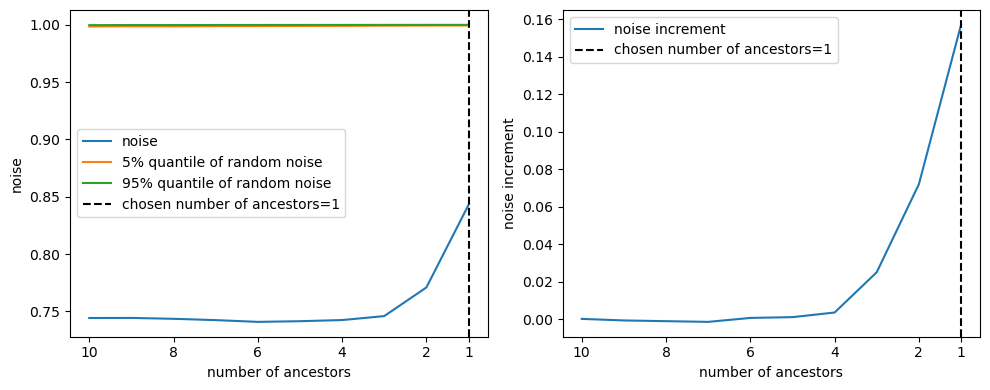

ancestors after pruning:  ['$P38$'] 





In [22]:
for node in graph_discovery.names[5:]:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto')
    print('\n')

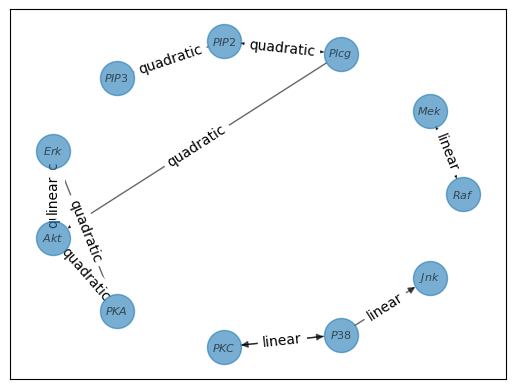

In [23]:
graph_discovery.plot_graph()

# Build graph with sub-set of nodes 

In [37]:
idx_subset   = [0,2,7,8]
X_subset     = X[:,idx_subset]
nodes_subset = []
for idx in idx_subset:
    nodes_subset.append(node_names[idx])
print(nodes_subset)

modes=ModeContainer.make_container(
    X_subset.T,
    onp.array(nodes_subset),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1.0},
)

['$Raf$', '$Plcg$', '$PKA$', '$PKC$']


In [38]:
graph_discovery = GraphDiscoveryNew(X_subset.T,onp.array(nodes_subset),modes)

inspecting $Raf$
linear kernel (using gamma=1.86e+03)
 n/(n+s)=0.99, Z=1.00
quadratic kernel (using gamma=1.74e+03)
 n/(n+s)=0.99, Z=1.00
gamma too small for set tolerance(6.72e-16), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.98, Z=0.99
$Raf$ has ancestors with gaussian kernel (n/(s+n)=0.98)
ancestors : ['$Plcg$', '$PKC$']
 n/(n+s)=0.99, Z=1.00
ancestors : ['$Plcg$']
 n/(n+s)=1.00, Z=1.00


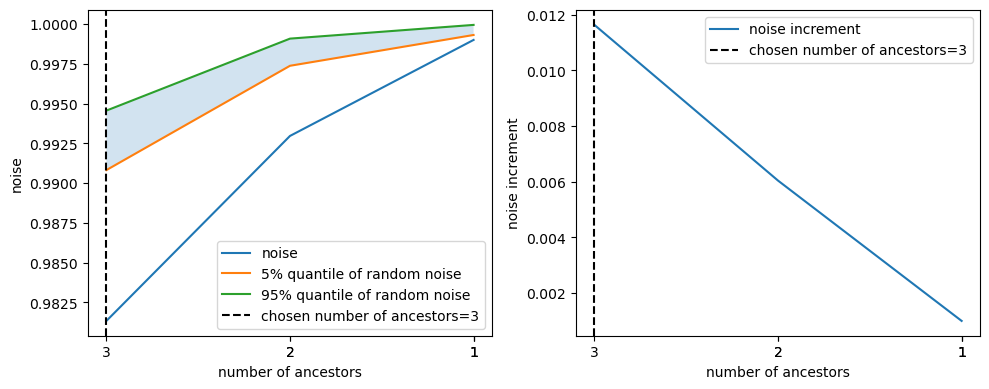

ancestors after pruning:  ['$Plcg$', '$PKA$', '$PKC$'] 



inspecting $Plcg$
linear kernel (using gamma=1.57e+03)
 n/(n+s)=0.97, Z=1.00
quadratic kernel (using gamma=1.36e+03)
 n/(n+s)=0.98, Z=1.00
gamma too small for set tolerance(4.00e-15), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.95, Z=0.99
$Plcg$ has ancestors with gaussian kernel (n/(s+n)=0.95)
ancestors : ['$Raf$', '$PKC$']
 n/(n+s)=0.98, Z=1.00
ancestors : ['$Raf$']
 n/(n+s)=1.00, Z=1.00


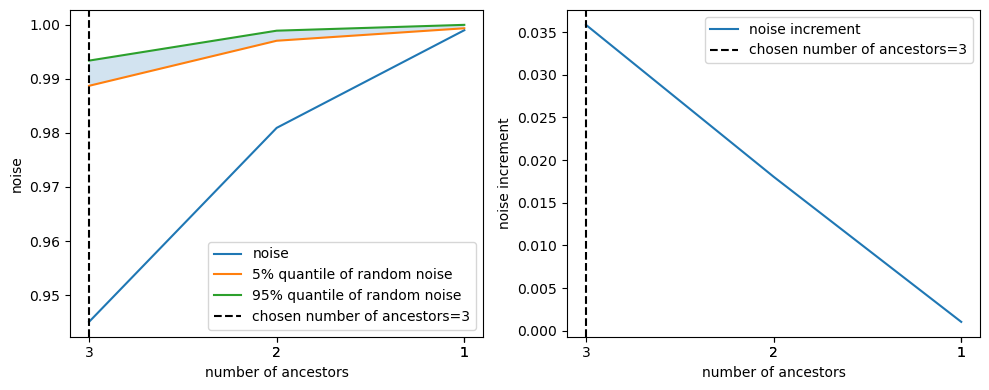

ancestors after pruning:  ['$Raf$', '$PKA$', '$PKC$'] 



inspecting $PKA$
linear kernel (using gamma=1.89e+03)
 n/(n+s)=0.99, Z=1.00
quadratic kernel (using gamma=1.86e+03)
 n/(n+s)=1.00, Z=1.00
gamma too small for set tolerance(2.09e-15), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.99, Z=0.99
$PKA$ has ancestors with gaussian kernel (n/(s+n)=0.99)
ancestors : ['$Raf$', '$PKC$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$Raf$']
 n/(n+s)=1.00, Z=1.00


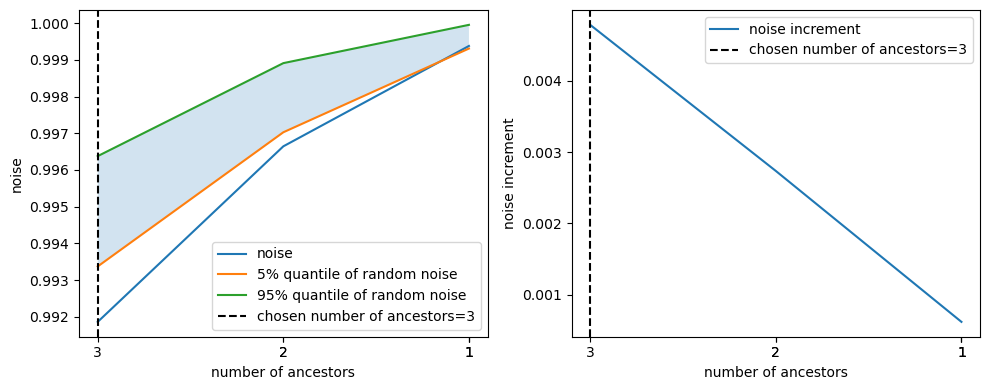

ancestors after pruning:  ['$Raf$', '$Plcg$', '$PKC$'] 



inspecting $PKC$
linear kernel (using gamma=1.65e+03)
 n/(n+s)=0.98, Z=1.00
quadratic kernel (using gamma=1.55e+03)
 n/(n+s)=0.98, Z=1.00
gamma too small for set tolerance(9.34e-15), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.98, Z=0.99
$PKC$ has ancestors with linear kernel (n/(s+n)=0.98)
ancestors : ['$Raf$', '$Plcg$']
 n/(n+s)=0.98, Z=1.00
ancestors : ['$Plcg$']
 n/(n+s)=0.98, Z=1.00


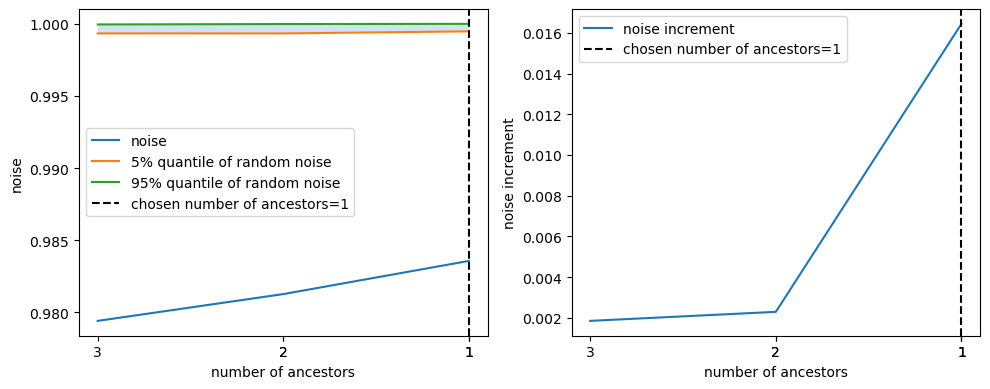

ancestors after pruning:  ['$Plcg$'] 





In [39]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto')
    print('\n')

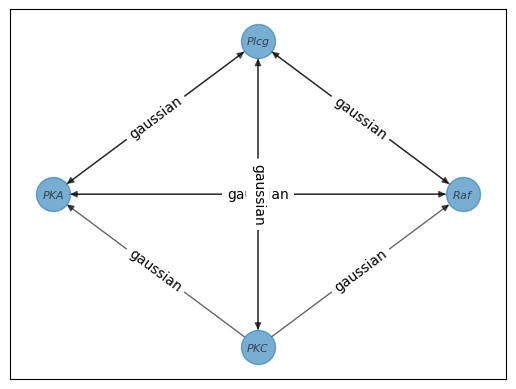

In [40]:
graph_discovery.plot_graph()